## Exploration of Sport Teams in Detroit Part-2
* Use Decision Tree model to find the final place from the data of sport teams' win rates and their divisions.

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
url = r'PATH'
df = pd.read_csv(url)
df.tail()

,Season,Pistons_Division,Pistons_Finish,Wins_x_x,Losses_x_x,Pistons_Win_rate,Pistons_games,Red_Wings_Division,Red_Wings_Finish,Red_Wings_Win_rate,...,Losses_x_y,Tigers_Win_rate,Tigers_games,Lions_Division,Lions_Finish,Lions_Win_rate,Wins_y_y,Losses_y_y,Ties_y,Lions_games
65,2015,Central,3.0,44,38,0.537,82.0,A,3.0,0.577,...,87,0.460,161.0,North,3.0,0.438,7.0,9.0,0.0,16.0
66,2016,Central,5.0,37,45,0.451,82.0,A,7.0,0.478,...,75,0.534,161.0,North,2.0,0.562,9.0,7.0,0.0,16.0
67,2017,Central,4.0,39,43,0.476,82.0,A,5.0,0.435,...,98,0.395,162.0,North,2.0,0.562,9.0,7.0,0.0,16.0
68,2018,Central,3.0,41,41,0.500,82.0,A,7.0,0.444,...,98,0.395,162.0,North,4.0,0.375,6.0,10.0,0.0,16.0
69,2019,Central,4.0,20,46,0.303,66.0,A,8.0,0.258,...,114,0.292,161.0,North,4.0,0.188,3.0,12.0,1.0,16.0


In [101]:
# Select the data for each sport team 
X1 = df[['Pistons_Division','Pistons_Win_rate','Pistons_games']].copy()
X1 = X1.dropna()

X2 = df[['Red_Wings_Division','Red_Wings_Win_rate','Red_Wings_games']].copy()
X2 = X2.dropna()

X3 = df[['Tigers_Division','Tigers_Win_rate','Tigers_games']].copy()
X3 = X3.dropna()

X4 = df[['Lions_Division','Lions_Win_rate','Lions_games']].copy()
X4 = X4.dropna()

In [102]:
# convert the parameter for decision tree (need the label as string instead of int or float)
y1 = df[['Pistons_Finish']].copy().astype(str)

y2 = df[['Red_Wings_Finish']].copy().astype(str)

y3 = df[['Tigers_Finish']].copy().astype(str)

y4 = df[['Lions_Finish']].copy().astype(str)

In [103]:
# Encode the characters to be 0,1,2,3... for classification
from sklearn import preprocessing
Division_1 = preprocessing.LabelEncoder()
Division_1.fit(X1['Pistons_Division'])
X1.iloc[:,0] = Division_1.transform(X1['Pistons_Division']) 

Division_2 = preprocessing.LabelEncoder()
Division_2.fit(X2['Red_Wings_Division'])
X2.iloc[:,0] = Division_2.transform(X2['Red_Wings_Division']) 

Division_3 = preprocessing.LabelEncoder()
Division_3.fit(X3['Tigers_Division'])
X3.iloc[:,0] = Division_3.transform(X3['Tigers_Division']) 

Division_4 = preprocessing.LabelEncoder()
Division_4.fit(X4['Lions_Division'])
X4.iloc[:,0] = Division_4.transform(X4['Lions_Division']) 

In [243]:
# make a function to examine the accuracy
from sklearn.model_selection import train_test_split
from sklearn import tree

def Accu_check(X,y):
    print('\n Feature Names: \n\n', X.columns.values, "\n")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = tree.DecisionTreeClassifier(max_depth=7,min_samples_leaf=7)
    clf.fit(X_train,y_train)
    print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf.score(X_test, y_test)))

In [263]:
Accu_check(X1,y1)
Accu_check(X2,y2)
Accu_check(X3,y3)
Accu_check(X4,y4)


 Feature Names: 

 ['Pistons_Division' 'Pistons_Win_rate' 'Pistons_games'] 

Accuracy of Decision Tree classifier on original training set: 0.46
Accuracy of Decision Tree classifier on original test set: 0.43

 Feature Names: 

 ['Red_Wings_Division' 'Red_Wings_Win_rate' 'Red_Wings_games'] 

Accuracy of Decision Tree classifier on original training set: 0.61
Accuracy of Decision Tree classifier on original test set: 0.64

 Feature Names: 

 ['Tigers_Division' 'Tigers_Win_rate' 'Tigers_games'] 

Accuracy of Decision Tree classifier on original training set: 0.48
Accuracy of Decision Tree classifier on original test set: 0.43

 Feature Names: 

 ['Lions_Division' 'Lions_Win_rate' 'Lions_games'] 

Accuracy of Decision Tree classifier on original training set: 0.64
Accuracy of Decision Tree classifier on original test set: 0.50



Feature Correlation:



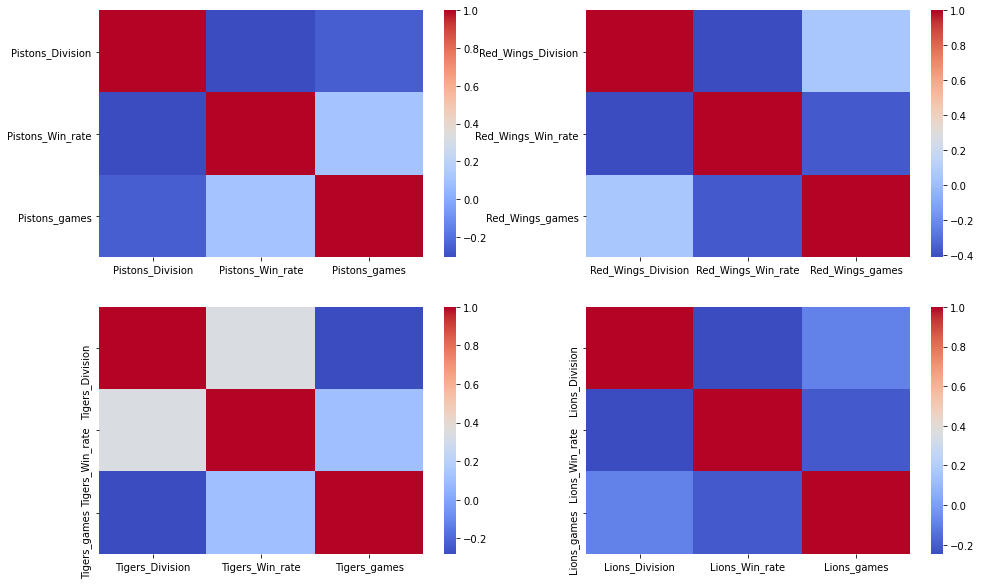

In [266]:
print("\nFeature Correlation:\n")
plt.figure(figsize = (16,10))

plt.subplot(2,2,1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
g = sns.heatmap(X1_train.corr(),cmap="coolwarm",annot=False)

plt.subplot(2,2,2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)
g = sns.heatmap(X2_train.corr(),cmap="coolwarm",annot=False)

plt.subplot(2,2,3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)
g = sns.heatmap(X3_train.corr(),cmap="coolwarm",annot=False)

plt.subplot(2,2,4)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2)
g = sns.heatmap(X4_train.corr(),cmap="coolwarm",annot=False)

In [284]:
feature_names1 = X1.columns.values
feature_names2 = X2.columns.values
feature_names3 = X3.columns.values
feature_names4 = X4.columns.values

clf1 = tree.DecisionTreeClassifier(max_depth=7,min_samples_leaf=7)
clf1.fit(X1_train,y1_train)
clf2 = tree.DecisionTreeClassifier(max_depth=7,min_samples_leaf=7)
clf2.fit(X2_train,y2_train)
clf3 = tree.DecisionTreeClassifier(max_depth=7,min_samples_leaf=7)
clf3.fit(X3_train,y3_train)
clf4 = tree.DecisionTreeClassifier(max_depth=7,min_samples_leaf=7)
clf4.fit(X4_train,y4_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [285]:
import graphviz
from sklearn.tree import export_graphviz
from graphviz import Source

def plot_decision_tree1(a,b,c):
    dot_data = tree.export_graphviz(a, out_file=None, 
                             feature_names=b, 
                             class_names=np.unique(c),
                             filled=True, rounded=True,  
                             special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph 

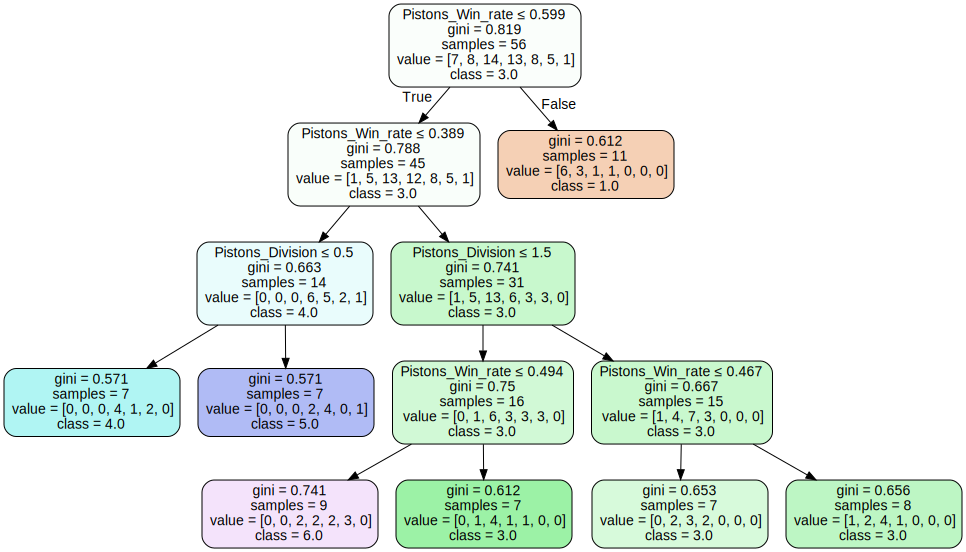

In [286]:
plot_decision_tree1(clf1,feature_names1,y1_train)

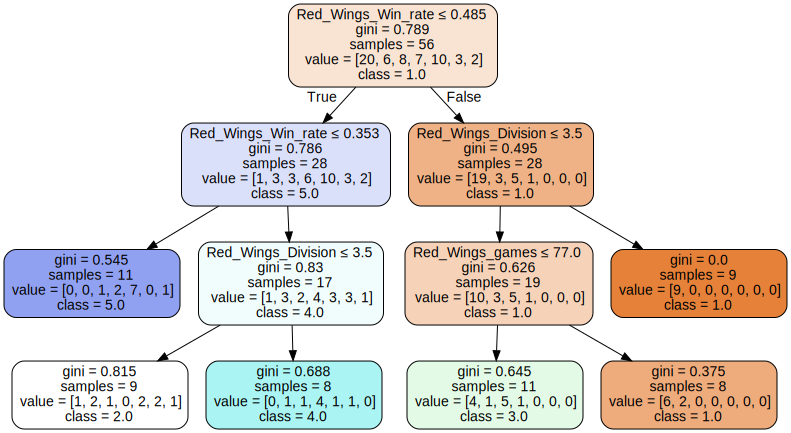

In [287]:
plot_decision_tree1(clf2,feature_names2,y2_train)

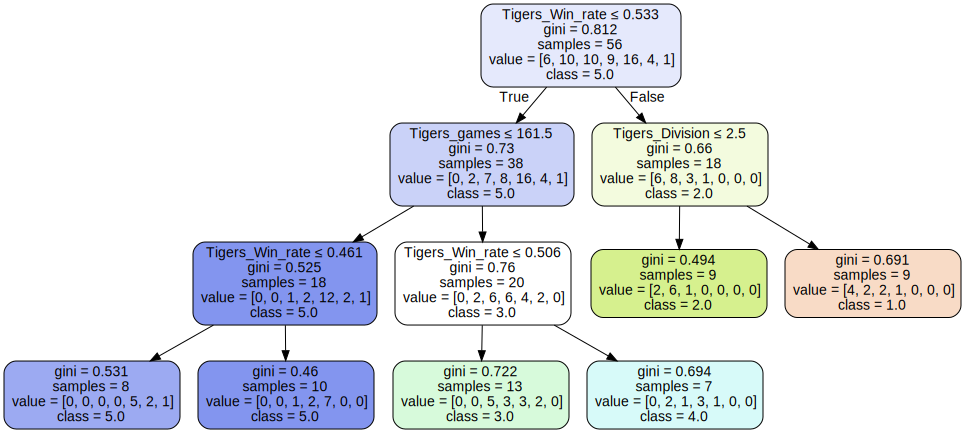

In [288]:
plot_decision_tree1(clf3,feature_names3,y3_train)

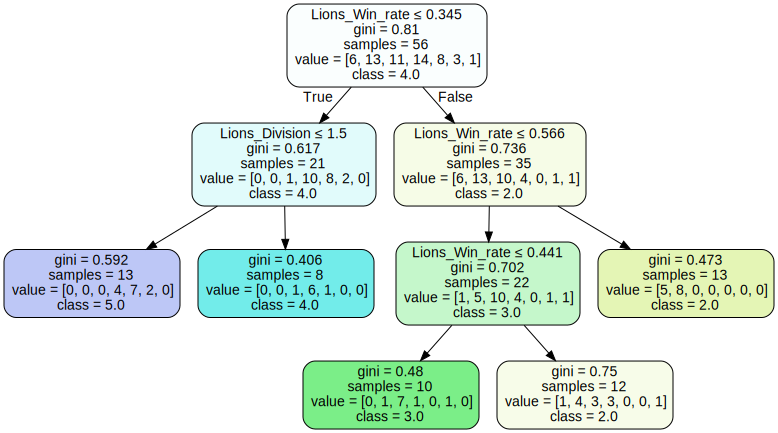

In [289]:
plot_decision_tree1(clf4,feature_names4,y4_train)

In [265]:
#Gini referred to as the Gini ratio, which measures the impurity of the node.